In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
LoanSanction = pd.read_csv('Data.csv')

In [3]:
LoanSanction.head(20)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
5,C-17688,Polly Crumpler,F,60,1234.92,Low,State servant,Secretaries,Rural,34434.72,...,684.12,1,Inactive,491,1234.92,2,Rural,1,43146.82,22382.57
6,C-23855,Nathalie Olivier,M,43,2361.56,Low,Working,Laborers,Semi-Urban,152561.34,...,637.29,0,Unpossessed,227,2361.56,1,Semi-Urban,1,221050.80,0.00
7,C-11006,Clarinda Montana,F,45,NaN,Low,State servant,Managers,Semi-Urban,240311.77,...,812.26,0,Active,314,NaN,2,Urban,1,401040.70,168218.24
8,C-26934,Kenny Ankrom,F,38,1296.07,Low,Working,Cooking staff,Rural,35141.99,...,705.29,1,Active,241,1296.07,4,Rural,1,54903.44,22842.29
9,C-24944,Barbie Goetsch,M,18,1546.17,Low,Working,Laborers,Rural,42091.29,...,613.24,0,Unpossessed,883,1546.17,2,Urban,1,67993.43,0.00


In [4]:
LoanSanction.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091408e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [5]:
LoanSanction.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [6]:
print(LoanSanction['Type of Employment'].value_counts())

Laborers                 5578
Sales staff              3736
Core staff               3230
Managers                 2495
Drivers                  1606
Accountants              1379
High skill tech staff    1307
Medicine staff            864
Security staff            579
Cooking staff             566
Private service staff     342
Cleaning staff            341
Low-skill Laborers        162
Secretaries               161
Waiters/barmen staff      149
Realty agents              86
IT staff                   77
HR staff                   72
Name: Type of Employment, dtype: int64


In [7]:
LoanSanction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [8]:
LoanSanction['Gender'].fillna(LoanSanction['Gender'].mode()[0],inplace=True)

In [9]:
LoanSanction['Income Stability'].fillna(LoanSanction['Income Stability'].mode()[0],inplace=True)

In [10]:
LoanSanction['Has Active Credit Card'].fillna(LoanSanction['Has Active Credit Card'].mode()[0],inplace=True)

In [11]:
LoanSanction['Property Location'].fillna(LoanSanction['Property Location'].mode()[0],inplace=True)

In [12]:
LoanSanction.isnull().sum()

Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                   4576
Income Stability                  0
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card            0
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location                 0
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [13]:
LoanSanction['Income (USD)'].fillna(LoanSanction['Income (USD)'].mean())



0        1933.050000
1        4952.910000
2         988.190000
3        2630.574417
4        2614.770000
            ...     
29995    4969.410000
29996    1606.880000
29997    2630.574417
29998    2417.710000
29999    3068.240000
Name: Income (USD), Length: 30000, dtype: float64

In [14]:
LoanSanction['Current Loan Expenses (USD)'].fillna(LoanSanction['Current Loan Expenses (USD)'].mean())


0        241.08
1        495.81
2        171.95
3        298.54
4        491.41
          ...  
29995    722.34
29996    253.04
29997    583.11
29998    378.29
29999    693.94
Name: Current Loan Expenses (USD), Length: 30000, dtype: float64

In [15]:
LoanSanction['Dependents'].fillna(2.000000)

0        3.0
1        1.0
2        1.0
3        2.0
4        2.0
        ... 
29995    2.0
29996    3.0
29997    2.0
29998    3.0
29999    1.0
Name: Dependents, Length: 30000, dtype: float64

In [16]:
LoanSanction['Credit Score'].fillna(LoanSanction['Credit Score'].mean())


0        809.440000
1        780.400000
2        833.150000
3        832.700000
4        745.550000
            ...    
29995    869.610000
29996    729.410000
29997    739.885381
29998    677.270000
29999    815.440000
Name: Credit Score, Length: 30000, dtype: float64

In [17]:
LoanSanction['Property Age'].fillna(LoanSanction['Property Age'].mean())


0        1933.05000
1        4952.91000
2         988.19000
3        2631.11944
4        2614.77000
            ...    
29995    4969.41000
29996    1606.88000
29997    2631.11944
29998    2417.71000
29999    3068.24000
Name: Property Age, Length: 30000, dtype: float64

In [18]:
 LoanSanction['Loan Sanction Amount (USD)'].fillna(LoanSanction['Loan Sanction Amount (USD)'].mean())


0         54607.18
1         37469.98
2         36474.43
3         56040.54
4         74008.28
           ...    
29995     68992.11
29996     46616.60
29997     61057.56
29998     99766.87
29999    117217.90
Name: Loan Sanction Amount (USD), Length: 30000, dtype: float64

In [19]:
LoanSanction.isnull().sum()

Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                   4576
Income Stability                  0
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card            0
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location                 0
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [20]:
LoanSanction.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,Active,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [21]:
LoanSanction.drop(['Type of Employment'], axis=1, inplace=True)

In [22]:
LoanSanction.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Semi-Urban,72809.58,241.08,...,809.44,0,Active,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,Semi-Urban,46837.47,495.81,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,Semi-Urban,45593.04,171.95,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,Rural,80057.92,298.54,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,Semi-Urban,113858.89,491.41,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [23]:
LoanSanction.isnull().sum()

Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                   4576
Income Stability                  0
Profession                        0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card            0
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location                 0
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [24]:
LoanSanction['Income (USD)'] = LoanSanction['Income (USD)'].fillna(2630)

In [25]:
LoanSanction.isnull().sum()

Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                      0
Income Stability                  0
Profession                        0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card            0
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location                 0
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [26]:
LoanSanction['Current Loan Expenses (USD)'] = LoanSanction['Current Loan Expenses (USD)'].fillna(400.936876)

In [27]:
LoanSanction.isnull().sum()

Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                      0
Income Stability                  0
Profession                        0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card            0
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location                 0
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [28]:
LoanSanction['Dependents'] = LoanSanction['Dependents'].fillna(2.000000)

In [29]:
LoanSanction.isnull().sum()

Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                      0
Income Stability                  0
Profession                        0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                        0
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card            0
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location                 0
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [30]:
LoanSanction['Credit Score'] = LoanSanction['Credit Score'].fillna(739.885381)

In [31]:
LoanSanction.isnull().sum()

Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                      0
Income Stability                  0
Profession                        0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                        0
Credit Score                      0
No. of Defaults                   0
Has Active Credit Card            0
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location                 0
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [32]:
LoanSanction['Property Age'] = LoanSanction['Property Age'].fillna(2631)

In [33]:
LoanSanction.isnull().sum()

Customer ID                      0
Name                             0
Gender                           0
Age                              0
Income (USD)                     0
Income Stability                 0
Profession                       0
Location                         0
Loan Amount Request (USD)        0
Current Loan Expenses (USD)      0
Expense Type 1                   0
Expense Type 2                   0
Dependents                       0
Credit Score                     0
No. of Defaults                  0
Has Active Credit Card           0
Property ID                      0
Property Age                     0
Property Type                    0
Property Location                0
Co-Applicant                     0
Property Price                   0
Loan Sanction Amount (USD)     340
dtype: int64

In [34]:
LoanSanction['Loan Sanction Amount (USD)'] = LoanSanction['Loan Sanction Amount (USD)'].fillna(47649.342208)

In [35]:
LoanSanction.isnull().sum()

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [36]:
LoanSanction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       30000 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 30000 non-null  float64
 5   Income Stability             30000 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Location                     30000 non-null  object 
 8   Loan Amount Request (USD)    30000 non-null  float64
 9   Current Loan Expenses (USD)  30000 non-null  float64
 10  Expense Type 1               30000 non-null  object 
 11  Expense Type 2               30000 non-null  object 
 12  Dependents                   30000 non-null  float64
 13  Credit Score    

In [37]:
LoanSanction.replace({'Gender':{'M':0,'F':1},'Income Stability':{'Low':0, 'High':1},
                      'Location':{'Rural':0,'Semi-Urban':1,'Urban':3}, 
                     'Has Active Credit Card':{'Unpossessed':0, 'Inactive':1, 'Active':2},
                      'Property Location':{'Rural':0,'Semi-Urban':1,'Urban':3}},inplace=True)

In [38]:
LoanSanction.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,1,56,1933.05,0,Working,1,72809.58,241.08,...,809.44,0,2,746,1933.05,4,0,1,119933.46,54607.18
1,C-33999,America Calderone,0,32,4952.91,0,Working,1,46837.47,495.81,...,780.40,0,0,608,4952.91,2,0,1,54791.00,37469.98
2,C-3770,Rosetta Verne,1,65,988.19,1,Pensioner,1,45593.04,171.95,...,833.15,0,0,546,988.19,2,3,0,72440.58,36474.43
3,C-26480,Zoe Chitty,1,65,2630.00,1,Pensioner,0,80057.92,298.54,...,832.70,1,0,890,2631.00,2,1,1,121441.51,56040.54
4,C-23459,Afton Venema,1,31,2614.77,0,Working,1,113858.89,491.41,...,745.55,1,2,715,2614.77,4,1,1,208567.91,74008.28


In [39]:
LoanSanction.drop(['Customer ID','Name','Profession'], axis=1, inplace=True)

In [40]:
LoanSanction.head()

,Gender,Age,Income (USD),Income Stability,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,1,56,1933.05,0,1,72809.58,241.08,N,N,3.0,809.44,0,2,746,1933.05,4,0,1,119933.46,54607.18
1,0,32,4952.91,0,1,46837.47,495.81,N,Y,1.0,780.40,0,0,608,4952.91,2,0,1,54791.00,37469.98
2,1,65,988.19,1,1,45593.04,171.95,N,Y,1.0,833.15,0,0,546,988.19,2,3,0,72440.58,36474.43
3,1,65,2630.00,1,0,80057.92,298.54,N,Y,2.0,832.70,1,0,890,2631.00,2,1,1,121441.51,56040.54
4,1,31,2614.77,0,1,113858.89,491.41,N,Y,2.0,745.55,1,2,715,2614.77,4,1,1,208567.91,74008.28


In [41]:
LoanSanction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       30000 non-null  int64  
 1   Age                          30000 non-null  int64  
 2   Income (USD)                 30000 non-null  float64
 3   Income Stability             30000 non-null  int64  
 4   Location                     30000 non-null  int64  
 5   Loan Amount Request (USD)    30000 non-null  float64
 6   Current Loan Expenses (USD)  30000 non-null  float64
 7   Expense Type 1               30000 non-null  object 
 8   Expense Type 2               30000 non-null  object 
 9   Dependents                   30000 non-null  float64
 10  Credit Score                 30000 non-null  float64
 11  No. of Defaults              30000 non-null  int64  
 12  Has Active Credit Card       30000 non-null  int64  
 13  Property ID     

In [42]:
LoanSanction.drop(['Expense Type 1','Expense Type 2'], axis=1, inplace=True)

In [43]:
LoanSanction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       30000 non-null  int64  
 1   Age                          30000 non-null  int64  
 2   Income (USD)                 30000 non-null  float64
 3   Income Stability             30000 non-null  int64  
 4   Location                     30000 non-null  int64  
 5   Loan Amount Request (USD)    30000 non-null  float64
 6   Current Loan Expenses (USD)  30000 non-null  float64
 7   Dependents                   30000 non-null  float64
 8   Credit Score                 30000 non-null  float64
 9   No. of Defaults              30000 non-null  int64  
 10  Has Active Credit Card       30000 non-null  int64  
 11  Property ID                  30000 non-null  int64  
 12  Property Age                 30000 non-null  float64
 13  Property Type   

In [44]:
x = LoanSanction.drop('Loan Sanction Amount (USD)', axis=1)

In [45]:
LoanSanction.drop('Loan Sanction Amount (USD)', axis=1)

,Gender,Age,Income (USD),Income Stability,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,1,56,1933.05,0,1,72809.58,241.08,3.0,809.440000,0,2,746,1933.05,4,0,1,119933.46
1,0,32,4952.91,0,1,46837.47,495.81,1.0,780.400000,0,0,608,4952.91,2,0,1,54791.00
2,1,65,988.19,1,1,45593.04,171.95,1.0,833.150000,0,0,546,988.19,2,3,0,72440.58
3,1,65,2630.00,1,0,80057.92,298.54,2.0,832.700000,1,0,890,2631.00,2,1,1,121441.51
4,1,31,2614.77,0,1,113858.89,491.41,2.0,745.550000,1,2,715,2614.77,4,1,1,208567.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,38,4969.41,0,3,76657.90,722.34,2.0,869.610000,0,0,566,4969.41,4,3,1,111096.56
29996,0,20,1606.88,0,1,66595.14,253.04,3.0,729.410000,0,1,175,1606.88,3,3,1,73453.94
29997,1,49,2630.00,0,3,81410.08,583.11,2.0,739.885381,0,2,959,2631.00,1,0,1,102108.02
29998,0,38,2417.71,0,1,142524.10,378.29,3.0,677.270000,1,0,375,2417.71,4,3,1,168194.47


In [46]:
y = LoanSanction['Loan Sanction Amount (USD)']

In [47]:
y

0         54607.18
1         37469.98
2         36474.43
3         56040.54
4         74008.28
           ...    
29995     68992.11
29996     46616.60
29997     61057.56
29998     99766.87
29999    117217.90
Name: Loan Sanction Amount (USD), Length: 30000, dtype: float64

In [48]:
X = LoanSanction.drop(columns='Loan Sanction Amount (USD)', axis=1)
Y = LoanSanction['Loan Sanction Amount (USD)']

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [50]:
print(X.shape, X_train.shape, X_test.shape)

(30000, 17) (24000, 17) (6000, 17)


In [51]:
regressor = LinearRegression()

In [52]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [53]:
training_data_prediction =regressor.predict(X_train)

In [54]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.5832198042022225


In [55]:
test_data_prediction =regressor.predict(X_test)

In [56]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.5529256824560141


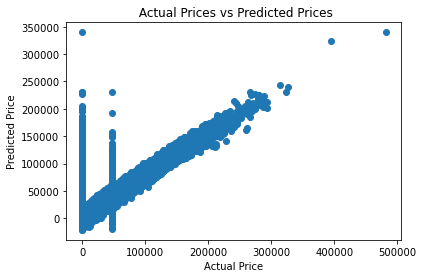

In [57]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

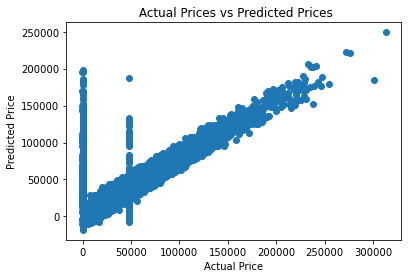

In [58]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [59]:
lass_reg_model = Lasso()

In [60]:
lass_reg_model.fit(X_train,Y_train)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.152e+13, tolerance: 5.526e+09
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [61]:
training_data_prediction = lass_reg_model.predict(X_train)

In [62]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5831990366337962


In [63]:
test_data_prediction = lass_reg_model.predict(X_test)

In [64]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5528458709405564


In [65]:
input_data = (0,75,9188.19,0,0,0,45593.04,171.95,1,833.15,0,1,446,444.19,2,2,1)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The loan amount is USD ', prediction[0])

[-585007.21686448]
The loan amount is USD  -585007.216864482


C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
